In [35]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [36]:
df = pd.read_csv('data/FuelConsumptionCo2.csv')


In [37]:
X = df.drop(columns=['MODELYEAR','MODEL','CO2EMISSIONS'],axis=1)


In [38]:
y = df['CO2EMISSIONS']

In [39]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [40]:
X = preprocessor.fit_transform(X)

In [41]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((853, 87), (214, 87))

In [42]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.9419
- Mean Absolute Error: 3.1226
- R2 Score: 0.9939
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.8020
- Mean Absolute Error: 3.6205
- R2 Score: 0.9919


Lasso
Model performance for Training set
- Root Mean Squared Error: 9.6884
- Mean Absolute Error: 6.6167
- R2 Score: 0.9764
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.7632
- Mean Absolute Error: 5.9589
- R2 Score: 0.9814


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.0565
- Mean Absolute Error: 3.2714
- R2 Score: 0.9936
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6741
- Mean Absolute Error: 3.6085
- R2 Score: 0.9922


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.9148
- Mean Absolute Error: 7.0110
- R2 Score: 0.9753
-----------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365.93349599279463, tolerance: 339.1734773739741
  model = cd_fast.sparse_enet_coordinate_descent(


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.0017
- Mean Absolute Error: 0.4772
- R2 Score: 0.9990
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2299
- Mean Absolute Error: 1.4218
- R2 Score: 0.9934


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.2014
- Mean Absolute Error: 0.1379
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.3202
- Mean Absolute Error: 1.1919
- R2 Score: 0.9973


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.7419
- Mean Absolute Error: 0.5836
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0448
- Mean Absolute Error: 1.0899
- R2 Score: 0.9990


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 12.1819
- Mean Absolute Error: 9.9424
- R2 Score: 0.9

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.998989
6,XGBRegressor,0.997334
4,Decision Tree,0.997227
5,Random Forest Regressor,0.993385
2,Ridge,0.992214
0,Linear Regression,0.991859
1,Lasso,0.981428
3,K-Neighbors Regressor,0.966838
8,AdaBoost Regressor,0.955368


**Decision Tree**

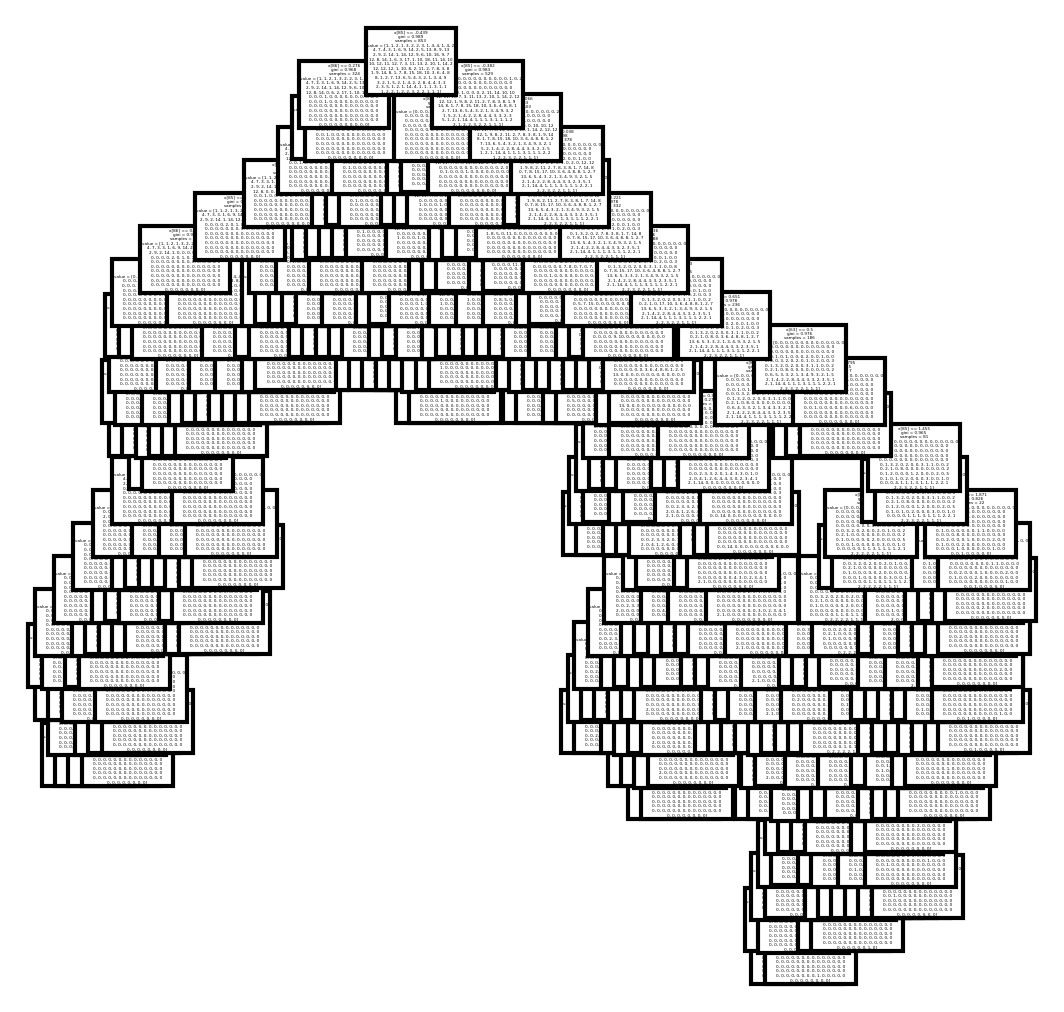

In [45]:

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dt_model);
fig.savefig('plottreedefault.png')

**Linear Regeression**

 Accuracy of the model is 99.19


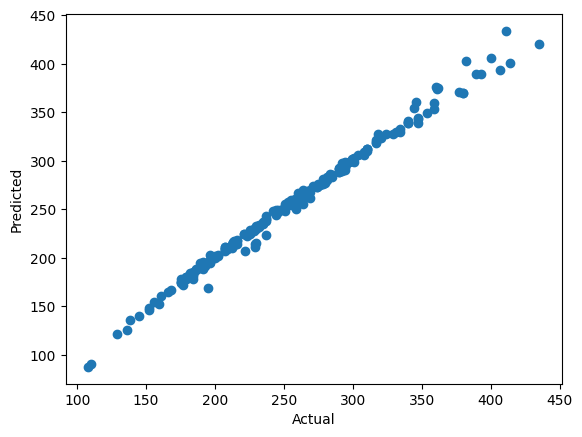

In [47]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [48]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
732,304,306.417356,-2.417356
657,221,224.810832,-3.810832
168,294,290.452977,3.547023
86,221,225.084179,-4.084179
411,207,211.402284,-4.402284
...,...,...,...
963,212,210.331381,1.668619
294,230,230.821348,-0.821348
275,232,232.160037,-0.160037
903,260,258.584959,1.415041
